# PyCity Schools Analysis

* As a whole, schools with higher budgets, did not yield better test results. By contrast, schools with higher spending per student actually (\$645-675) underperformed compared to schools with smaller budgets (<\$585 per student).

* As a whole, smaller and medium sized schools dramatically out-performed large sized schools on passing math performances (89-91% passing vs 67%).

* As a whole, charter schools out-performed the public district schools across all metrics. However, more analysis will be required to glean if the effect is due to school practices or the fact that charter schools tend to serve smaller student populations per school. 
---

### Note
* This analysis would help the school board and Mayor make strategic decisions regarding future school budgets and priorities.
This involves the analysis of the district-wide standardized test results. 

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas Data Frames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
school_data_complete.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


## District Summary

* Calculate the total number of schools

* Calculate the total number of students

* Calculate the total budget

* Calculate the average math score 

* Calculate the average reading score

* Calculate the overall passing rate (overall average score), i.e. (avg. math score + avg. reading score)/2

* Calculate the percentage of students with a passing math score (70 or greater)

* Calculate the percentage of students with a passing reading score (70 or greater)

* Create a dataframe to hold the above results

* Optional: give the displayed data cleaner formatting

In [181]:
m=school_data_complete[school_data_complete["math_score"]>69]
r=school_data_complete[school_data_complete["reading_score"]>69]
pd.options.display.float_format = '{:,.2f}'.format

summary=pd.DataFrame({"Total Schools":[(len(school_data_complete["school_name"].unique()))],
                      "Total Students":[len(school_data_complete["student_name"])],
                      "Total Budget":[school_data_complete["budget"].unique().sum().astype(float)],
                      "Average Math Score":[school_data_complete["math_score"].mean()],
                      "Average Reading Score":[school_data_complete["reading_score"].mean()],
                      "% Passing Math":[(m["math_score"].count()/school_data_complete["math_score"].count())*100],
                      "% Passing Reading":[(r["reading_score"].count()/school_data_complete["reading_score"].count())*100],
                      "% Overall Passing Rate":[(school_data_complete["math_score"].mean()+school_data_complete["reading_score"].mean())/2]})

summary=summary[["Total Schools","Total Students","Total Budget","Average Math Score","Average Reading Score","% Passing Math","% Passing Reading","% Overall Passing Rate"]]
summary["Total Students"]=summary["Total Students"].map("{:,}".format)
summary

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
0,15,"39,170","24,649,428.00",78.99,81.88,74.98,85.81,80.43


## School Summary

* Create an overview table that summarizes key metrics about each school, including:
  * School Name
  * School Type
  * Total Students
  * Total School Budget
  * Per Student Budget
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)
  
* Create a dataframe to hold the above results

## Top Performing Schools (By Passing Rate)

* Sort and display the top five schools in overall passing rate

In [2]:

read_Pass_Percent=school_data_complete[["school_name","reading_score"]]
rs=[]
rs1=[]
for i ,j in read_Pass_Percent.groupby("school_name"):
     rs.append(j[j["reading_score"]>69].count())
for i in rs:
    rs1.append(i[1])
rs1

[4077,
 1803,
 2381,
 2172,
 1426,
 3748,
 411,
 2372,
 3867,
 923,
 3208,
 1688,
 1591,
 2204,
 1739]

In [3]:
math_Pass_Percent=school_data_complete[["school_name","math_score"]]
ms=[]
ms1=[]
for i ,j in math_Pass_Percent.groupby("school_name"):
     ms.append(j[j["math_score"]>69].count())
for i in ms:
    ms1.append(i[1])
ms1

[3318,
 1749,
 1946,
 1871,
 1371,
 3094,
 395,
 1916,
 3145,
 910,
 2654,
 1653,
 1525,
 2143,
 1680]

In [4]:
s=school_data_complete[["school_name","student_name","reading_score","math_score","type","budget"]]
s=pd.DataFrame(s.groupby(["school_name","type"]).agg({"student_name":"count","reading_score":"mean","math_score":"mean","budget":"mean"}))
s.reset_index(inplace=True)
pd.options.display.float_format = '{:,.2f}'.format

s=s.rename(columns={"student_name":"student_count"})
s["Per_student_budget"]=s["budget"]/s["student_count"]
s["% Passing Math"]=(ms1/s["student_count"])*100
s["% Passing Reading"]=(rs1/s["student_count"])*100
s["% Overall Passing Rate"]=(s["% Passing Math"]+s["% Passing Reading"])/2

s=s.rename(columns={"type":"School Type",
                    "student_count":"Total Students",
                    "budget":"Total School Budget",
                    "math_score":"Average math score",
                   "reading_score":"Average reading score"})
s=s[["school_name","School Type","Total Students","Total School Budget","Per_student_budget",
     "Average math score","Average reading score","% Passing Math","% Passing Reading",
     "% Overall Passing Rate"]]
s["Total School Budget"]=s["Total School Budget"].map("${:,}".format)
s["Per_student_budget"]=s["Per_student_budget"].map("${:,}".format)
s=s.sort_values(by="% Overall Passing Rate",ascending=False)
s.set_index("school_name",inplace=True)
s

,School Type,Total Students,Total School Budget,Per_student_budget,Average math score,Average reading score,% Passing Math,% Passing Reading,% Overall Passing Rate
school_name,,,,,,,,,
Cabrera High School,Charter,1858,"$1,081,356",$582.0,83.06,83.98,94.13,97.04,95.59
Thomas High School,Charter,1635,"$1,043,130",$638.0,83.42,83.85,93.27,97.31,95.29
Pena High School,Charter,962,"$585,858",$609.0,83.84,84.04,94.59,95.95,95.27
Griffin High School,Charter,1468,"$917,500",$625.0,83.35,83.82,93.39,97.14,95.27
Wilson High School,Charter,2283,"$1,319,574",$578.0,83.27,83.99,93.87,96.54,95.20
Wright High School,Charter,1800,"$1,049,400",$583.0,83.68,83.95,93.33,96.61,94.97
Shelton High School,Charter,1761,"$1,056,600",$600.0,83.36,83.73,93.87,95.85,94.86
Holden High School,Charter,427,"$248,087",$581.0,83.80,83.81,92.51,96.25,94.38
Bailey High School,District,4976,"$3,124,928",$628.0,77.05,81.03,66.68,81.93,74.31


## Bottom Performing Schools (By Passing Rate)

* Sort and display the five worst-performing schools

In [5]:
s.sort_values(by="% Overall Passing Rate").head()


,School Type,Total Students,Total School Budget,Per_student_budget,Average math score,Average reading score,% Passing Math,% Passing Reading,% Overall Passing Rate
school_name,,,,,,,,,
Rodriguez High School,District,3999,"$2,547,363",$637.0,76.84,80.74,66.37,80.22,73.29
Figueroa High School,District,2949,"$1,884,411",$639.0,76.71,81.16,65.99,80.74,73.36
Huang High School,District,2917,"$1,910,635",$655.0,76.63,81.18,65.68,81.32,73.50
Johnson High School,District,4761,"$3,094,650",$650.0,77.07,80.97,66.06,81.22,73.64
Ford High School,District,2739,"$1,763,916",$644.0,77.10,80.75,68.31,79.30,73.80


## Math Scores by Grade

* Create a table that lists the average Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

  * Create a pandas series for each grade. Hint: use a conditional statement.
  
  * Group each series by school
  
  * Combine the series into a dataframe
  
  * Optional: give the displayed data cleaner formatting

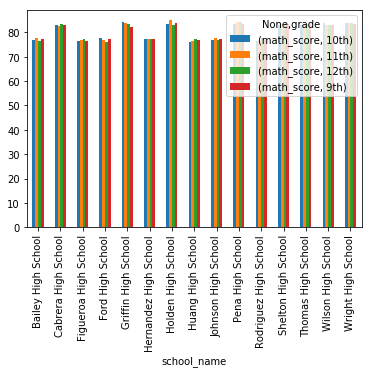

In [6]:
mscore=school_data_complete[["school_name","grade","math_score"]]
mscore=mscore.groupby(["school_name","grade"]).mean().unstack()
mscore.plot(kind='bar')
plt.show()

## Reading Score by Grade 

* Perform the same operations as above for reading scores

In [7]:
rscore=school_data_complete[["school_name","grade","reading_score"]]
rscore=rscore.groupby(["school_name","grade"]).mean().unstack()
rscore



reading_score                  
grade                          10th  11th  12th   9th
school_name                                          
Bailey High School            80.91 80.95 80.91 81.30
Cabrera High School           84.25 83.79 84.29 83.68
Figueroa High School          81.41 80.64 81.38 81.20
Ford High School              81.26 80.40 80.66 80.63
Griffin High School           83.71 84.29 84.01 83.37
Hernandez High School         80.66 81.40 80.86 80.87
Holden High School            83.32 83.82 84.70 83.68
Huang High School             81.51 81.42 80.31 81.29
Johnson High School           80.77 80.62 81.23 81.26
Pena High School              83.61 84.34 84.59 83.81
Rodriguez High School         80.63 80.86 80.38 80.99
Shelton High School           83.44 84.37 82.78 84.12
Thomas High School            84.25 83.59 83.83 83.73
Wilson High School            84.02 83.76 84.32 83.94
Wright High School            83.81 84.16 84.07 83.83

## Scores by School Spending

* Create a table that breaks down school performances based on average Spending Ranges (Per Student). Use 4 reasonable bins to group school spending. Include in the table each of the following:
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)

In [8]:
s

,School Type,Total Students,Total School Budget,Per_student_budget,Average math score,Average reading score,% Passing Math,% Passing Reading,% Overall Passing Rate
school_name,,,,,,,,,
Cabrera High School,Charter,1858,"$1,081,356",$582.0,83.06,83.98,94.13,97.04,95.59
Thomas High School,Charter,1635,"$1,043,130",$638.0,83.42,83.85,93.27,97.31,95.29
Pena High School,Charter,962,"$585,858",$609.0,83.84,84.04,94.59,95.95,95.27
Griffin High School,Charter,1468,"$917,500",$625.0,83.35,83.82,93.39,97.14,95.27
Wilson High School,Charter,2283,"$1,319,574",$578.0,83.27,83.99,93.87,96.54,95.20
Wright High School,Charter,1800,"$1,049,400",$583.0,83.68,83.95,93.33,96.61,94.97
Shelton High School,Charter,1761,"$1,056,600",$600.0,83.36,83.73,93.87,95.85,94.86
Holden High School,Charter,427,"$248,087",$581.0,83.80,83.81,92.51,96.25,94.38
Bailey High School,District,4976,"$3,124,928",$628.0,77.05,81.03,66.68,81.93,74.31


In [9]:
# Sample bins. Feel free to create your own bins.
spending_bins = [0, 585, 615, 645, 675]
group_names = ["<$585", "$585-615", "$615-645", "$645-675"]
sss=s[["Per_student_budget","Average math score","Average reading score","% Passing Math","% Passing Reading","% Overall Passing Rate"]]
sss["Per_student_budget"]=sss["Per_student_budget"].str.extract('(\d+)').astype(int)
sss=sss.reset_index()
sss=sss.drop("school_name",axis=1)
sss['spending']=pd.cut(sss["Per_student_budget"],bins=spending_bins,labels=group_names)
ss=sss.groupby('spending').mean()
ss=ss.drop('Per_student_budget',axis=1)
ss

,Average math score,Average reading score,% Passing Math,% Passing Reading,% Overall Passing Rate
spending,,,,,
$585-615,83.60,83.89,94.23,95.90,95.07
$615-645,79.08,81.89,75.67,86.11,80.89
$645-675,77.00,81.03,66.16,81.13,73.65
<$585,83.46,83.93,93.46,96.61,95.04


## Scores by School Size

* Perform the same operations as above, based on school size.

In [170]:
# Sample bins. Feel free to create your own bins.
size_bins = [0, 1000, 2000, 5000]
group_names = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [176]:
scs=s[["Total Students","Average math score","Average reading score","% Passing Math","% Passing Reading","% Overall Passing Rate"]]
scs["school size"]=pd.cut(scs["Total Students"],bins=size_bins,labels=group_names)
scs.reset_index(inplace=True)
scs=scs.drop('school_name',axis=1)            
sc=scs.groupby('school size').mean()
sc.drop("Total Students",axis=1)



,Average math score,Average reading score,% Passing Math,% Passing Reading,% Overall Passing Rate
school size,,,,,
Large (2000-5000),77.75,81.34,69.96,82.77,76.36
Medium (1000-2000),83.37,83.86,93.60,96.79,95.20
Small (<1000),83.82,83.93,93.55,96.10,94.82


## Scores by School Type

* Perform the same operations as above, based on school type.

In [177]:
sst=s[["School Type","Average math score","Average reading score","% Passing Math","% Passing Reading","% Overall Passing Rate"]]
st=sst.groupby('School Type').mean()
st



,Average math score,Average reading score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Type,,,,,
Charter,83.47,83.90,93.62,96.59,95.10
District,76.96,80.97,66.55,80.80,73.67
